In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### A first look at the data

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The TotalCharges column is having the data type as object which indicates it must be having non-numeric values. 

In [190]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [191]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [192]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The column TotalCharges is null for tenure columns which is having 0 days. Hence we will repalce the NaN values with $0.

In [193]:
data[data['TotalCharges'].isnull() == True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

#### Next we’ll convert the categorical values into numeric values, so our ML algorithms can process the data. We will also remove the columns not used in the predictive model.

In [194]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


#### Correlations between customer data features and customer churn

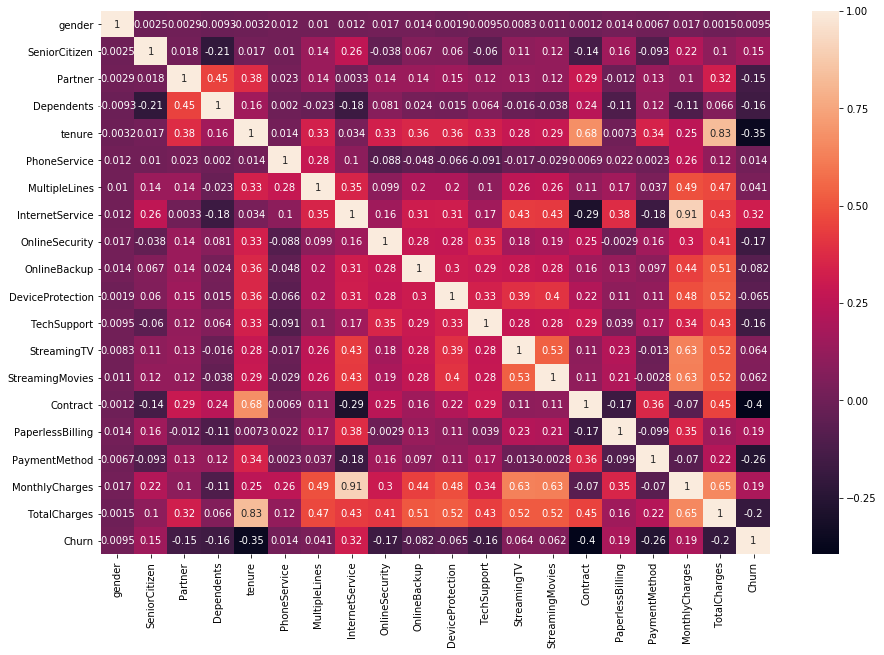

In [195]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), ax=ax, annot=True);

### Avoiding Multicollinearity

As we can see from the above figure, TotalCharges and MonthlyCharges are highly Collinear which would be a problem for linear regression since any increase in one variable causing the other to increase. Hence to avoid this we will need to drop the column as it is highly correlated to both MonthlyCharges and Tenure.

In [196]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [197]:
data = data.drop("TotalCharges",axis=1)

In [198]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


### Predictive Modeling

We will now train the model to make the prediction on the customer churn using Machine learning algorithms. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 25% of the total records.

In [199]:
X = data.iloc[:,0:18]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70


In [200]:
Y = data.iloc[:,18]
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [201]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, test_size = 0.25)
X = data.iloc[:,0:17]
Y = data.iloc[:,18]
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)
 
#train_y = train['Churn']
#test_y = test['Churn']
 
#train_x = train
#train_x.pop('Churn')
#test_x = test
#test_x.pop('Churn')

Accuracy of logistic regression classifier on test set: 0.80
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1298
          1       0.64      0.52      0.57       463

avg / total       0.79      0.80      0.79      1761



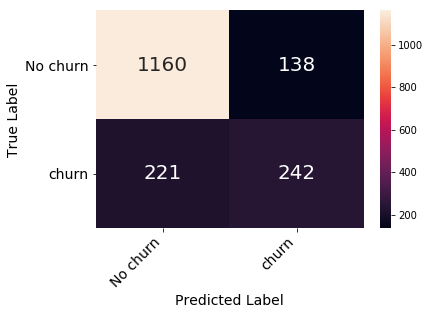

In [202]:
# Fitting Logistic Regression for the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
# y_pred is a vector of predictions that gives the pred of each of the test set observations
y_pred = classifier.predict(X_test)
cm_df = confusion_matrix(Y_test,y_pred)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test,Y_test)))
print(classification_report(Y_test,y_pred))
#confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
cm_df = pd.DataFrame(cm_df,('No churn','churn'),('No churn','churn'))
heatmap = sns.heatmap(cm_df,annot=True, annot_kws={"size": 20}, fmt="d");
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True Label',fontsize=14);
plt.xlabel('Predicted Label',fontsize=14);

We got 81% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

### How to handle imbalanced classes

It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [203]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The class for churn is only around 25% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. There are a number of techniques for handling imbalanced classes:

### Up-sampling the minority class

To balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement:

In [204]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_unsampled = resample(data_minority,replace=True,n_samples=5174,random_state=1)
data_unsampled = pd.concat([data_majority,data_minority_unsampled])
data_unsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, let’s train another logistic regression model:

In [205]:
X = data_unsampled.iloc[:,0:17]
Y = data_unsampled.iloc[:,18]
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

classifier_balanced = LogisticRegression(random_state=0)
classifier_balanced.fit(X_train,Y_train)
y_pred = classifier_balanced.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier_balanced.score(X_test,Y_test)))
print(classification_report(Y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.76
             precision    recall  f1-score   support

          0       0.77      0.72      0.75      1265
          1       0.75      0.80      0.77      1322

avg / total       0.76      0.76      0.76      2587



The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved. There are a number of other ways to deal with imbalanced classes, including:

### Down-sampling the majority class

Similar to the above method, we reduce the number of samples in the majority class to be equal to the number of samples in the minority class.

### Using Decision Tree

In [207]:
from sklearn import tree

# Create a Decision Tree for Pruned and Unpruned data
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth=4)

#Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train,y=Y_train)
decisionTree = decisionTree.fit(X=X_train,y=Y_train)

In [209]:
predicted_dt = decisionTree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test,Y_test)))
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(decisionTree.score(X_train,Y_train)))
print('Accuracy of unpruned Decision Tree classifier on test: {:.2f}'.format(decisionTree_unpruned.score(X_test,Y_test)))
print('Accuracy of unpruned Decision Tree classifier on train set: {:.2f}'.format(decisionTree_unpruned.score(X_train,Y_train)))

Accuracy of Decision Tree classifier on test set: 0.76
Accuracy of Decision Tree classifier on train set: 0.77
Accuracy of unpruned Decision Tree classifier on test: 0.85
Accuracy of unpruned Decision Tree classifier on train set: 0.98


Exactly as we suspected! The unpruned tree gets a perfect score on the training set, but a relatively lower score (85%) on the test set. Our pruned tree is less accurate on the training set, but performs better when presented with the out-of-sample test data.

In [187]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train, Y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, Y_test)))

Accuracy of random forest classifier on test set: 0.88


Looks like we get similar performance to our pruned decision tree with a random forest. The next step would be to run several more rounds of cross validation using different training and testing sets to measure the performance of each of the models. We would then average the results from all rounds of cross validation to estimate the accuracy of each machine learning model.